# Er and Etj sorting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import os
import cv2
import matplotlib.pyplot as plt
path1 = r"D:\Manoj\immarticus\plant_identification"
cate = ['Er', 'Etj']

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
image_size = 200
input_image = []
for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)     # 0 , 1
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path)
        image_array =cv2.resize(image_array , (image_size  , image_size) )
        input_image.append([image_array , label]) # imag

In [ ]:
np.random.shuffle(input_image)
X= []
Y = []
for i , j in input_image:
    X.append(i)
    Y.append(j)

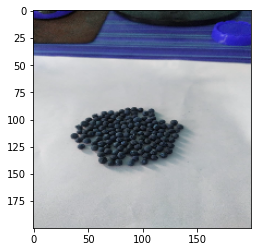

In [ ]:
plt.imshow(X[8])

In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
X = X/255 # normalized the data

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(3,3) , activation ='relu'  ,   ))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128 , activation = 'relu' , input_shape = X.shape[1:]))
model.add(Dense(2 , activation= 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(X,Y, epochs = 20)

Epoch 1/20
3/3 [==============================] - 4s 426ms/step - loss: 36.5087 - accuracy: 0.5441
Epoch 2/20
3/3 [==============================] - 2s 437ms/step - loss: 46.9241 - accuracy: 0.4412
Epoch 3/20
3/3 [==============================] - 2s 461ms/step - loss: 16.8886 - accuracy: 0.4853
Epoch 4/20
3/3 [==============================] - 2s 434ms/step - loss: 9.1303 - accuracy: 0.5588
Epoch 5/20
3/3 [==============================] - 2s 443ms/step - loss: 11.3141 - accuracy: 0.5588
Epoch 6/20
3/3 [==============================] - 2s 472ms/step - loss: 6.1051 - accuracy: 0.5588
Epoch 7/20
3/3 [==============================] - 2s 483ms/step - loss: 1.0699 - accuracy: 0.6324
Epoch 8/20
3/3 [==============================] - 2s 462ms/step - loss: 1.9822 - accuracy: 0.4412
Epoch 9/20
3/3 [==============================] - 1s 427ms/step - loss: 0.4731 - accuracy: 0.6912
Epoch 10/20
3/3 [==============================] - 2s 441ms/step - loss: 0.4503 - accuracy: 0.7794
Epoch 11/20
3/3

In [ ]:
pred = model.predict(X)

3/3 [==============================] - 0s 105ms/step


In [ ]:
pred

array([[1.32125225e-02, 9.86787438e-01],
       [2.00571492e-02, 9.79942858e-01],
       [9.98147607e-01, 1.85245986e-03],
       [9.96462166e-01, 3.53783392e-03],
       [9.97753561e-01, 2.24650349e-03],
       [9.98147607e-01, 1.85245986e-03],
       [7.93640222e-03, 9.92063582e-01],
       [9.18240607e-01, 8.17594528e-02],
       [5.27819339e-03, 9.94721770e-01],
       [2.99269389e-02, 9.70073104e-01],
       [9.92736340e-01, 7.26366509e-03],
       [4.32165802e-01, 5.67834198e-01],
       [2.90673366e-03, 9.97093201e-01],
       [9.72910762e-01, 2.70892661e-02],
       [2.38918164e-03, 9.97610807e-01],
       [9.85527158e-01, 1.44728189e-02],
       [9.98561561e-01, 1.43840711e-03],
       [9.97920215e-01, 2.07977369e-03],
       [2.05835506e-01, 7.94164479e-01],
       [9.83525991e-01, 1.64740793e-02],
       [4.32165802e-01, 5.67834198e-01],
       [3.71065997e-02, 9.62893426e-01],
       [1.28982335e-01, 8.71017635e-01],
       [1.27769992e-01, 8.72230053e-01],
       [1.181508

In [ ]:
pred_class = np.argmax(pred, axis = 1)
pred_class

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
tab1_mnist = confusion_matrix(Y, pred_class)
tab1_mnist

array([[27,  3],
       [ 0, 38]], dtype=int64)

In [ ]:
tab1_mnist.diagonal().sum() *100/tab1_mnist.sum()

95.58823529411765

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
accuracy_score(Y, pred_class)

0.9558823529411765

In [ ]:
precision_score(Y, pred_class)

0.926829268292683